In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('superstore_sales.csv',encoding='latin1')

In [6]:
print(data.head())

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

In [7]:
print(data.isnull().sum())

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [8]:
data = data.fillna(0) 

In [9]:
data = data.drop_duplicates()

In [11]:
print(data.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [14]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d/%m/%Y')


In [15]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   object        
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

In [17]:
print(data.describe())

            Row_ID   Postal_Code         Sales
count  9800.000000   9800.000000   9800.000000
mean   4900.500000  55211.280918    230.769059
std    2829.160653  32076.677954    626.651875
min       1.000000      0.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  57551.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [18]:
sales_trends = data.groupby(data['Order_Date'].dt.to_period('M'))['Sales'].sum()
print(sales_trends)

Order_Date
2015-01    28828.2540
2015-02    12588.4840
2015-03    54027.6920
2015-04    24710.0160
2015-05    29520.4900
2015-06    29181.3346
2015-07    35194.5580
2015-08    37349.2655
2015-09    65956.3998
2015-10    34561.9470
2015-11    64369.4565
2015-12    63568.3107
2016-01    29347.3864
2016-02    20728.3520
2016-03    34489.6776
2016-04    38056.9685
2016-05    30761.5585
2016-06    28515.9082
2016-07    28573.3100
2016-08    49076.9300
2016-09    65352.9970
2016-10    31631.8890
2016-11    50009.1450
2016-12    52891.8832
2017-01    38048.1840
2017-02    48907.5900
2017-03    48990.1410
2017-04    42368.0480
2017-05    64836.2518
2017-06    37424.6810
2017-07    41761.9430
2017-08    45766.8144
2017-09    40692.3063
2017-10    52156.9580
2017-11    66392.5470
2017-12    72847.0855
2018-01    59767.0910
2018-02    48928.8334
2018-03    74748.6238
2018-04    37849.2156
2018-05    40882.4464
2018-06    46912.8475
2018-07    53942.7755
2018-08    75408.7840
2018-09    73153.3640

In [19]:
region_performance = data.groupby('Region')['Sales'].sum()
print(region_performance)

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [20]:
category_performance = data.groupby('Category')['Sales'].sum()
print(category_performance)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

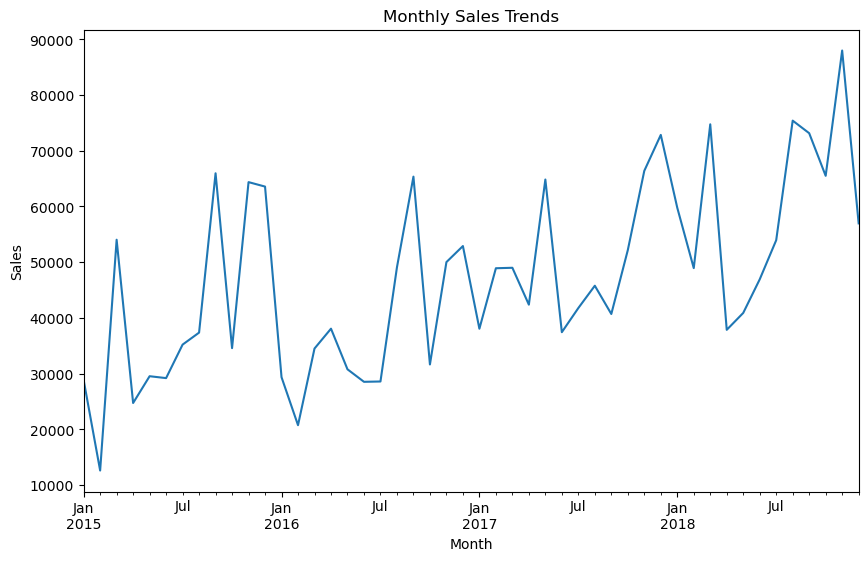

In [22]:
sales_trends.plot(kind='line', title='Monthly Sales Trends', ylabel='Sales', xlabel='Month', figsize=(10, 6))
plt.show()

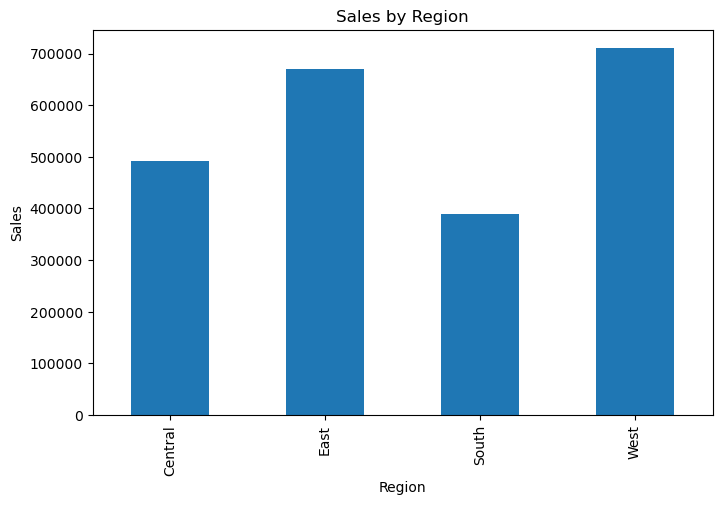

In [23]:
region_performance.plot(kind='bar', title='Sales by Region', ylabel='Sales', xlabel='Region', figsize=(8, 5))
plt.show()

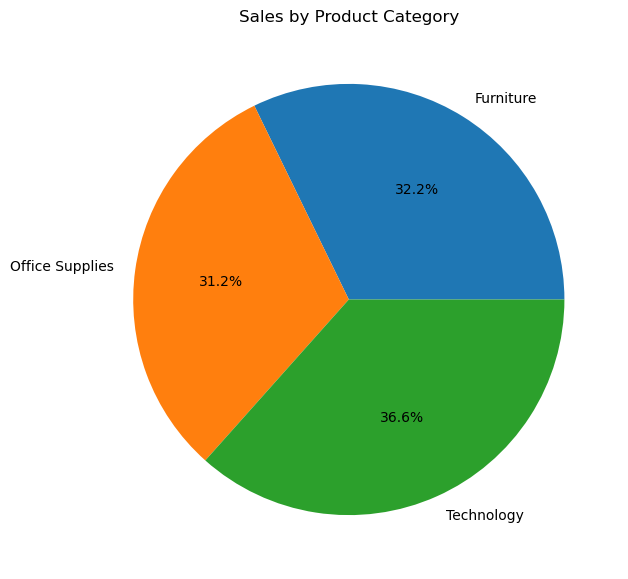

In [24]:
category_performance.plot(kind='pie', title='Sales by Product Category', autopct='%1.1f%%', figsize=(7, 7))
plt.ylabel('') 
plt.show()
